# Matplotlib

Matplotlib je biblioteka za kreiranje vizualizacija u Python programskom jeziku

##### Kreiranje dijagrama

Matplotlib kreira grafike na figurama (```Figure```) (prozor). Svaki ```Figure``` može da sadrži region za crtanje podataka (```Axes```) sa 2 ili 3(za 3D) pojedinačne ose (```Axis```). Region ima i naslov i labelu za svaku osu.

Najlakši način za kreiranje figure sa osama je korišćenjem ```pyplot.subplots```. Onda możemo da koristimo ```Axes.plot``` da prikažemo podatke na osama.

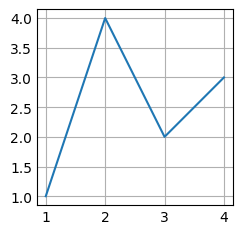

In [59]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()  # Kreiranje figure sa jednim osama(regionom)
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Iscrtavanje podataka na osama

![primer](legend.png)

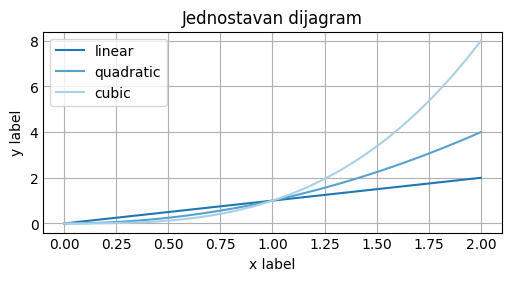

In [60]:
x = np.linspace(0, 2, 100)  # Podaci za primer

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')  # Iscrtavanje podataka
ax.plot(x, x**2, label='quadratic')  # Iscrtavanje još podataka
ax.plot(x, x**3, label='cubic')  # ...i još
ax.set_xlabel('x label')  # Dodavanje an x-labele
ax.set_ylabel('y label')  # Dodavanje y-labele
ax.set_title("Jednostavan dijagram")  # Dodavanje naslova
ax.legend()  # Dodavanje legende

## Bar chart

Jednostavan za jasan za razumevanje. Može se koristiti za poredjenje vrednosti u istoj kategoriji ili za praćenje napretka jedne ili dve varijable tokom vremena.

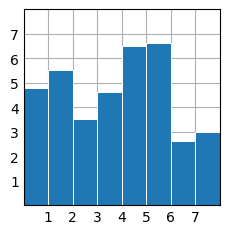

In [61]:
plt.style.use('_mpl-gallery')

# napravi podatke:
x = 0.5 + np.arange(8)
y = [4.8, 5.5, 3.5, 4.6, 6.5, 6.6, 2.6, 3.0]

# iscrtaj
fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

### Scatter chart

Za prikazivanje korelacije veličina može se koristiti scatterplot. Vrednost jedne promenljive se  prikaže na X osi, vrednost druge na Y osi, a svaka tačka je često individualna pojava iz podataka - osoba, sesija, primerak...

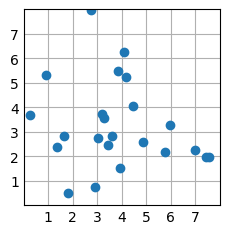

In [62]:
plt.style.use('_mpl-gallery')

# napravi podatke:
np.random.seed(3)
x = 4 + np.random.normal(0, 2, 24)
y = 4 + np.random.normal(0, 2, len(x))

# iscrtaj
fig, ax = plt.subplots()

ax.scatter(x, y)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

Ako treba uneti i treću promenljivu, može se promeniti veličina svake tačke tako da predstavlja vrednost treće promenljive. Onda dobijamo - bubble chart.

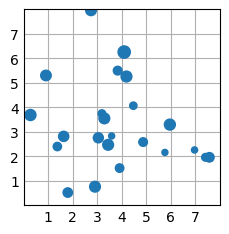

In [63]:
plt.style.use('_mpl-gallery')

# napravi podatke:
np.random.seed(3)
x = 4 + np.random.normal(0, 2, 24)
y = 4 + np.random.normal(0, 2, len(x))
# veličina :
sizes = np.random.uniform(15, 80, len(x))

# iscrtaj
fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

## Line chart

Koristi se za prikazivanje promene odredjene mere kroz vreme, naročito kada X osa ima dosta vrednosti.
Na taj način se može videti da li postoji trend rasta, koja je maksimalna vrednost u poslednjih nedelju dana i slično.

## Stack chart (Area chart)

Korisni su za praćenje proporcija dve metrike kroz vreme

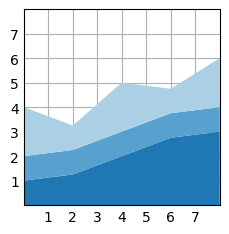

In [66]:
plt.style.use('_mpl-gallery')

# napravi podatke:
x = np.arange(0, 10, 2)
ay = [1, 1.25, 2, 2.75, 3]
by = [1, 1, 1, 1, 1]
cy = [2, 1, 2, 1, 2]
y = np.vstack([ay, by, cy])

# iscrtaj
fig, ax = plt.subplots()

ax.stackplot(x, y)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

### Pie ili donut chart

Dobar izbor za prikazivanje kako dva ili više delova čine celinu.

([<matplotlib.patches.Wedge at 0x118ad2290>,
 [Text(0.9801071672559598, 0.4993895680663527, 'Frogs'),
  Text(-0.33991877217145816, 1.046162142464278, 'Hogs'),
  Text(-0.49938947630209474, -0.9801072140121813, 'Dogs'),
  Text(1.0461621822461364, -0.3399186497354948, 'Logs')])

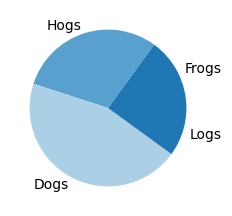

In [67]:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

### Histogram chart

TBD